# Iris 품종분류

a. Iris의 품종의 측정 데이터 존재

-setosa, vericolor, viginica\
-(꽃잎) pertal legnth, pertal width\
-(꽃받핌) sepal legnth, sepal width

b. 품종별 측정데이터를 이용해 새로 채집한 iris의 품종을 예측하는 ML 모델을 \
c. 품종별 측정 데이터가 이미 존재하므로 지도학습(supervised learning)\
d. 3개의 품종 중 하나를 예측하는 문제이므로 분류(classification)문제\
e. 입력 특성값을  feature(4개), 결과값은 (3개의 class)라 함\
i. 한 개의 꽃에 대한 측정갑승ㄹ 한 개의 품종으로 출력, 이 때 출력값(풍좀)을 label이라 \
* sample: futures 과 하나의 타겟값을 묶은 것을 샘플이라 한다 \


In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print ("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(iris_dataset['DESCR'][:300]+"\n")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal w



-키값 불러오는 것
    :print(df.keys())

-키의 값 확인하는 방법
    :print(df.['값'])
    :옵션- 글자수가 많을 경우 일부만 불러온다 [:n]
    : 위의 경우, 자동 줄바꿈 : \n

In [7]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [8]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# 데이터의 타입 알아보기 
print("data type:", type(iris_dataset['data']))

data type: <class 'numpy.ndarray'>


In [11]:
# 데이터의 사이즈 알아보기 
print("data size:", iris_dataset['data'].shape)

data size: (150, 4)


In [12]:
# 이 출력 결과가 각각 class다 
print("data sample:", iris_dataset['data'][:5])

data sample: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
# 타켓의 타입 알아보기 
print("data type:", type(iris_dataset['target']))

data type: <class 'numpy.ndarray'>


In [16]:
# 출력값을 보니 1찰원 배열
print("data type:", iris_dataset['target'].shape)

data type: (150,)


In [17]:
print("target:\n", iris_dataset['target'])

target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 성과 축정

a. 머신러닝 모델을 구축해 새로운 데이터의 품종을 예측해야 함
* 모델은 숙학적 알고리즘 (하나의 함수와, 그 함수값을 찾아는 해결책이 한 세트로 모델)

b. 훈련에 사용한 데이터는 평가에 사용할 수 없음 ( 모델이 훈련하는 동안 데이터를 기억함)

c. 150개의 sample을 training set과 test set으로 나누어야 함
- scikit-learn의 train_test_split함수를 사용하여 데이터를 나눔
- 데이터는 대문자 X, 레이블을 소문자 y로 표기 (관례)
    - 2차원 행렬의 특징
- train_test_split 함수의 test_size 값을 0.0~ 1.0 사이로 지정할 수 있음. 지정하지 않으면 train set = 0.75, test set= 0.25 기본 지정됨 (default)
- random_state 값은 랜덤 seed(0~42)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [20]:
print("X_train size:", X_train.shape)
print("X_train size:", y_train.shape)

X_train size: (112, 4)
X_train size: (112,)


In [22]:
print("X_test size:", X_test.shape)
print("X_test size:", y_test.shape)

X_test size: (38, 4)
X_test size: (38,)


# 모델 구축

- 머신러닝 모델을 구축하기 전에데이터를 조사해야 한다(머신러닝이 필요한지, 누락된 정보가 있는지 ..)
    - 머신러닝 모델 구축 전, 머신 러닝에 훈련을 시키기 전에 이 데이터가 어떤 머신 러닝에 적합한지 조사 (데이터 전처리)
- pip install mglearn, 저자(Andreas C Müller)가 만든 라이브러리

In [23]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

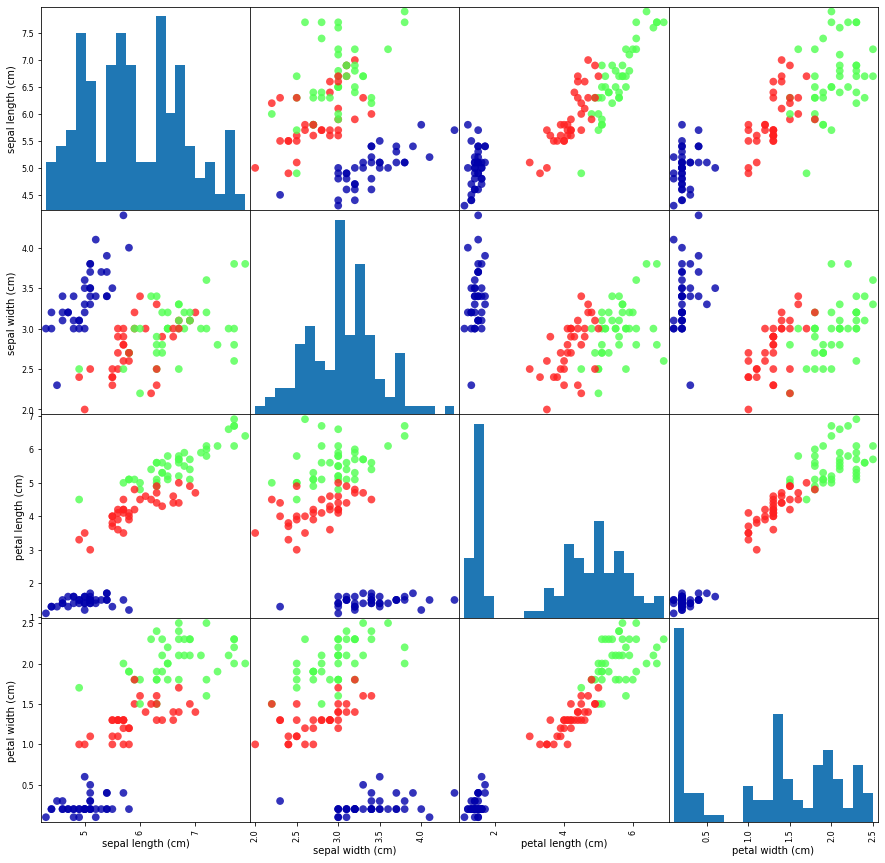

In [27]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                           marker='o', hist_kwds={'bins':20}, s=60, alpha=.8,
                           cmap=mglearn.cm3)
plt.show()

k-최근접 이웃 알고리즘(k-Nearest Neighbors, k-NN)

- 훈련 데이터를 저장하여 생성
- 새로운 데이터에 대한 예측은 가장 가까운 훈련 데이터의 포인트를 찾아서 결정
- 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾음
- 위에서 찾은 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용( 자세한 내용은 2장에서), 이 예제에서는 하나의 이웃만 사용

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
# 이제 훈련 데이터를 떼어냈는으므로, 그 75% 에 대해 학습을 시켜야 한다 .
# 학습은 항상 fit 이다
# df.fit(X_tran, y_train)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

- 예측하기
- separ length/width = 5/2.9, petal legnth/width = 1/0.2
- 위 데이터를 Numpy 2차원 배열로 생성
- 예측은 prediction 을 사용
    - df.predict(new_df)

In [32]:
import numpy as np
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shpae:", X_new.shape)

X_new.shpae: (1, 4)


In [34]:
prediction = knn.predict(X_new)
print("예측값:", prediction)

예측값: [0]


In [35]:
print("target 이름:", iris_dataset['target_names'][prediction])

target 이름: ['setosa']


# 모델 평가하기

- test set 을 이용하여 모델의 정확도를 계산.평가

In [36]:
# 결과값 추출
y_pred = knn.predict(X_test)
print("test set 예측값:\n", y_pred)

test set 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [37]:
print("test set에 대한 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

test set에 대한 정확도: 0.97


In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("test set에 대한 정확도: {:.2f}".format(knn.score(X_test, y_test)))

test set에 대한 정확도: 0.97


## 2.1 분류(Clsassification)와 회귀(Regression)  
1. 분류  
a. 분류는 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측  
b. 두 개의 클래스로 분류하는 건 이진 분류(binary classification), 셋 이상의 클래스로 분류하는 건 다중 분류(multiclass classification) 이라 함  

2. 회귀  
a. 연속적인 숫자(실수)를 예측  
b. 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 또는 특정 농산물의 올 해 수확량 예측  
c. 분류문제와 달리 회귀문제에서는 출력값의 작은 차이는 문제가 되지 않음

## 2.2 일반화, 과대적ㅎ압, 과소적합

- 지도학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 있같다면 (테스트를 위해 넣은 값이 훈련된 갑과 같다면), 처음 보는 데이터가 주어져도 정확히 예측할 수 있음
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다면 이를 훈련 세트에서 테스트 세트로 일반화(geberalization)되었다고 함
- 보유하고 있는 모든 정보를 이용해 만든 복잡한 모델은 훈련 세트에만 최적화되어 세로운 데이터에 일반화 되기 어렵다. 이를 과대적합(overfiting)이라 다.
- 모델이 너무 간단하면 데이터의 다양성을 잡아내어 정확도도 떨어짐.이를 과소적합(underfiting)이라 함
- 과대 적합: 훈련에선 정확도가 높으나 테스트에선 정확도가 떨어진다. 
- 과소적업: 훈련과 테스트 모두 정확도가 떨어진다

Ex) 45세 이상이고, 자녀가 3미만이며, 이혼하지 않은 고객은 보트를 살 것이다. 
- 모델이란, 수학적 알고리즘의 표현식
- 다음 그림과 같이 일반화 성능이 최대가 되는 최적점에 있는 모델을 찾아야 함
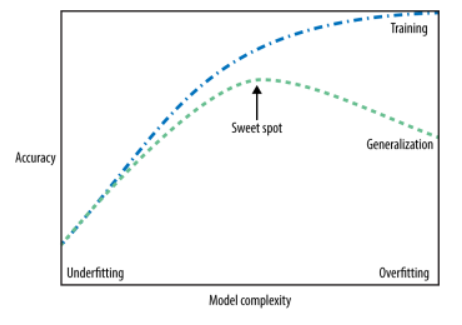

In [40]:
데이터 세트에 다양한 포인트가 많ㅇ을수록(featrue) 과대적앟비 없어 더 복합잡 모델을 구축할 수 있음

SyntaxError: invalid syntax (<ipython-input-40-eb1e214a8fdb>, line 1)

## 2.3 지도 합ㄱ습 알고리즘

1. 예제애 사용할 테이터 셋
    a. forge데이터셋은 인위적으로 만든 데이터세 feature 2개, target1개
 
- x축은 첫 번째 특성, y축은 두 번째 특성으로 그래프 작성


In [46]:
import mglearn
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


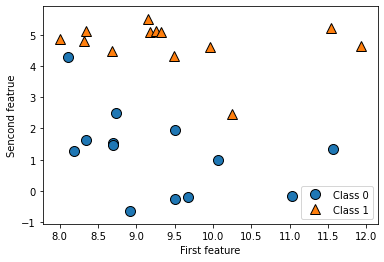

X.shape: (26, 2)


In [48]:
# 시각화 
mglearn.discrete_scatter(X[:, 0], x[:, 1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Sencond featrue")
plt.show()
print("X.shape:", X.shape)

b. 회귀 알고리즘에는 인위적으로 만든 wave 데이터셋을 사용
- 입력 특성 한 개와 target 변수를 가짐
- 특성을 x축, target을 y축

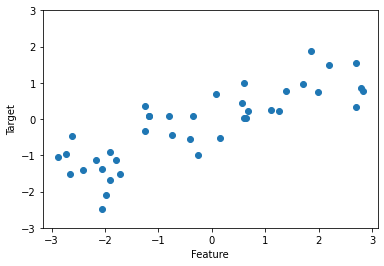

In [53]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [52]:
# 세번째는 실제 데이터를 사용

c. scikit-learn 에 들어있는 실제 데이터셋 사용

- 유방암 종양의 암상 데이터를 기록해 놓은 취스콘신 유방암 데이터 셋(cancer)
- 각 종양은 양성(benign)과 악성(malignant)로 레이블 되어 있음
- 조직 데이터를 기반으로 종양이 악성인지를 예측하도록 학습하는 것이 과제

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [56]:
print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [57]:
print("target_names:", cancer.target_names)

target_names: ['malignant' 'benign']


In [58]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [60]:
# 각각 양성과 앙성이 몇개인지 구분
import numpy as np
print("클래스별 샘플 수:\n{}".format({n: v for n, v in zip(cancer.target_names, 
                                                 np.bincount(cancer.target))} ))

클래스별 샘플 수:
{'malignant': 212, 'benign': 357}


In [63]:
print("feature names:\n{}".format(cancer.feature_names))

feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [64]:
print(cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [65]:
d. 또 하나의 실제 데이터셋

- 보스턴 주변 주택가격 데이서 셋
- 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1980년대 보스턴 주변의 주택 평균 가격을 예측
- 이 데이터 셋에는 샘플 506개 feature 13개

SyntaxError: invalid syntax (<ipython-input-65-d615dd4fa2ba>, line 1)

In [69]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape:", boston.data.shape)

shape: (506, 13)


- 이 데이터 셋에는 13개의 입력 feature뿐 아니라 feature끼리 곱하여 의도적으로 확장
    - 13개를 각각 곱하면 104개의 경욱의 수가 나옴
- 이러한 방법을 특성공학(feature engineering) 이라 함

In [72]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


# 2.4 k-nn

a. k-Nearest Neighbors
  - k-NN은 가장 가까운 훈련 데이터 샘플을 최근에 이웃으로 찾아 예측에 사용
   

/Users/jeongsarah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


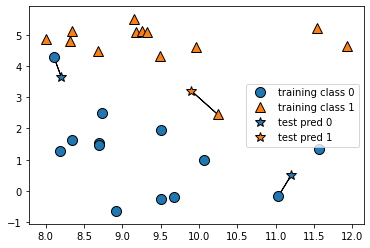

In [73]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

/Users/jeongsarah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


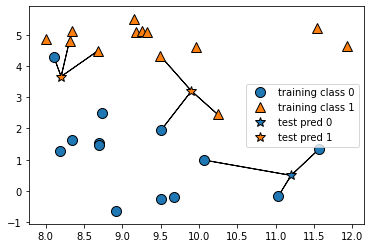

In [74]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

- 최상단 샘플의 예측 결과가 달라짐
- scikit-learn을 사용하여 수행

In [93]:
# 일단 dataset을 train 과 test 로 나누어 구분
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/jeongsarah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [94]:
# KNN 모델 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [95]:
# 학습을 시킨다 -> fit 이용
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [97]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


# KNeighborsClassifier 분석
- 2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려봄
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 찰하여 결정 경계(decision boundary)를 확인함
- 다음은 이웃이 하나, 셋, 아홉 개일 떄의 결정 경계를 보여줌 

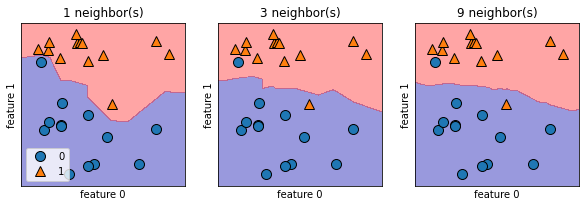

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

- 이웃을 하나 선택했을 때는 결정 정계까 훈련 데이터에 가깝게 따라감
- 이웃의 수를 늘릴 수록 결정 경계는 부드러워짐. 부드러운 경계는 더 단순한 모델을 의미
- 이웃을 적게 사용하면 모델의 복잡도가 (Overfiting), 많이 사용하면 복잡도는 감소(Underfiting)
- 훈련 데이터 전체 수를 이웃의 수로 지정하는 극단적인 경우, 모든 테스트 포인트가 같은 이웃을 가지므로 테스트 포인트에 대한 예측은 모두 같은 값이 나옴
- 즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨
* 이웃의 수를 정확히 집어낼 수 있는 공식은 없다

- 유방암 데이터셋을 통해 모델의 복잡도 및 성능 테스트
- 모델의 복잡도와 일반화 사이의 관계를 입증해 봄
- 실제 데이터이유방함 데이터셋을 사용
- 훈련 세트와 테스트 세트로 나눔
- 이웃의 수를 달리하면서 훈련 세트와 테스트 세트의 성능을 평가함



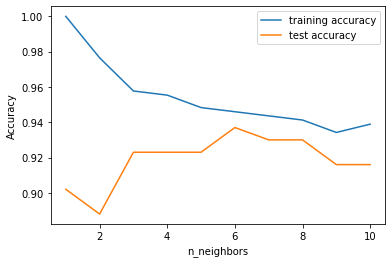

In [111]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

 - Overfiting Rhk Underfiting의 특성을 잘 보여줌
 * Overfiting 은 훈련할떄는 정확도가 높았는데 실제에선 정확도가 떨어지는 것
 * Underfiting은 훈련할때와 실테 테스트 모두 정확도가 떨어지는 것
 - 최근접 이웃의 수가 하나일 떄는 훈련 데이터에 대한 예측이 완벽
 - 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 감소
 - 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 떄보다 낮음
     - 즉, 왼쪽의 편차가 큰 쪽이 Overfiting
 - 1-NN 이 모델을 너무 복잡하게 만든다는 것을 설명함
 - 10-NN은 모델이 너무 단순해서 정확도는 떨어짐
 - 정확도가 가장 좋을 때는 중간 정도한 6-NN dla
     - 이 모델에서는 6-NN 가장 정확도가 높으므로, 가장 이상적인 모델은 6-NN 이다.  

# K-NN

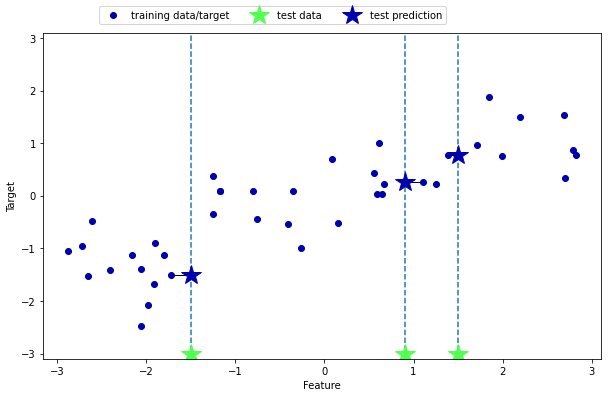

In [112]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

* 파란점이 훈련 데이터셋
* 초록색 점이 테스트셋

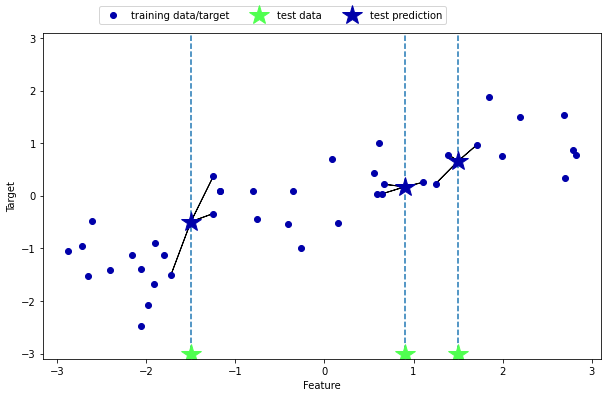

In [113]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()
# 선에 가장 가까운 3개 값의 y값을 sum/3 -> 평균값을 구한다

In [119]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [120]:
print("Test set predictinos:\n", reg.predict(X_test))

Test set predictinos:
 [-1.23423166  0.18400081  0.49083154 -1.23423166  1.06165975  1.0717713
  0.230253    0.230253   -1.23751806 -0.65851598]


In [121]:
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Test set score: 0.70


* 회귀에서 score 를 내는 방법

- 이 메서드는 회귀일 땐 R<sup>2</sup> 값을 반환 : R<sup>2</sup> = 1 - ( sigma(y-예측값)<sup>2</sup> / sigma(y-평균)<sup>2</sup> )  
- 결정 계수라고도 하는 R<sup>2</sup> 값은 회귀 모델에서 예측의 적합도를 측정한 값, 보통 0과 1사이의 값  
- 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균만으로만 예측하는 모델의 경우  
    * 0이라는 뜻은: 정확히 예측하지 못하고 평균값만 내고 있다는 의미
- R<sup>2</sup> 은 음수가 될 수도 있음, 이 때는 예측과 target이 상반된 경향을 가지는 경우  

KNeighborsRegression 분석
- 1차원 데이터셋에 대한 가능한 모든 특성 값을 만들어 

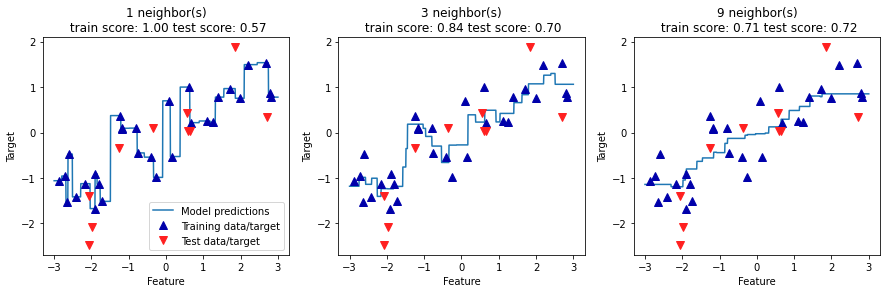

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
# x값을 -3부터 3 사이를 1000개로 자름
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    # 삼각형은 훈련용, 역삼각형은 테스트 데이터
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

    *첫번째 데이터는 Overfitin, 마지막 테이터는 Underfiting
- 이웃을 하나만 사용할 떄는 훈련 세트의 각 데이터 포인트가 예측해 주는 영향이 커서 예측값이 흔련 데이터 포인트를 모두 지나감
- 이는 매우 불안정한 예측을 만들어 냄 
- 이웃을 많이 사용하며 훈련 데이터는 잘 안 맞을 수 있지만 더 안정적인 예측을 얻음

# 장단점과 매개변수
 - 일반적으로 KNeighbors 분류기에 중요한 매개변수는 두 개, 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수
 - 실제로 이웃의 수는 3개나 5개 정도로 작을 떄 잘 작동하지만, 이 매개변수는 잘 조정해야 함
 - 거리를 재는 방법을 고르는 문제는 또 다른 문제, 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용(mertic 매개변수를 사용하여 거리 측정 방식을 변경할 수 있음)
 - k-NN의 장점은 이해하기가 매우 쉬운 모델. 많은 조정이 필요 없이 자주 좋은 성능을 발휘
     - 머신러닝 중 가장 이해하기 쉬운 모델
 - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 좋은 시작점
 - 훈련 세트가 매우 크면 (=훈련용 샘플 수가 너무 많으면) 예측이 느려짐
 - k-NN 알고리즘을 사용할 떄는 데이터 전처리가 매우 종요(모든 특성값들이 같은 스케일을 갖도록 정규화하는 것이 일반적)
 - 수백 개 이상의 많은 feature를 가진 데이터셋에는 잘 동작하지 않음
 - k-NN 알고리즘이 이해하긴 쉽지만, 예측이 느리고 많은 feature를 처리하는 능력이 부족해 현업에서는 잘 쓰이지 않음
 
  * 이 단점들을 보완하기 위해 선형 모델 알고리즘들이 등장